In [1]:
import random
from random import randint
import pandas as pd
import numpy as np
import gym
import matplotlib.pyplot as plt
import seaborn as sns

---
## Helper functions

### Reward and reward per episode

In [2]:
def var(N,episodes,epsilon,alpha,gamma):
    M = np.zeros((N,episodes))
    Mre=np.zeros((N,episodes))
    for n in range(N):
        _,R,_,_,_,Rf,_ = FL_play(episodes=episodes,epsilon=epsilon,alpha=alpha,gamma=gamma)
        M[n] = Rf
        Mre[n] = R
    return np.mean(M,axis=0),np.mean(Mre,axis=0)

In [3]:
def plot_average_rewards_per_episode(N,episodes,epsilon,alpha,gamma):
    M,Mre = var(N,episodes=episodes,epsilon=epsilon,alpha=alpha,gamma=gamma)
    Mr,Mrer = var(N,episodes=episodes,epsilon=1.0,alpha=alpha,gamma=gamma)
    plt.figure(figsize=(15,8))
    plt.plot(range(M.shape[0]),np.cumsum(M),label="$\epsilon$=0.1, std:{:.3f}, lr={:.1f}, $\gamma$={:.1f}".format(np.std(Mre),alpha,gamma))
    plt.plot(range(Mr.shape[0]),np.cumsum(Mr),label="$\epsilon$=1.0, std:{:.3f}, lr={:.1f}, $\gamma$={:.1f}".format(np.std(Mrer),alpha,gamma))
    plt.title('Learning curve - Max R: {:.0f}'.format(sum(Mre)),fontsize=16)
    plt.xlabel('Episodes',fontsize=16)
    plt.ylabel('Average Reward per episode',fontsize=16)
    plt.legend(loc=0,fontsize=16)
    plt.show()

In [4]:
def plot_average_rewards(N,episodes,epsilon,alpha,gamma):
    M,Mre = var(N,episodes=episodes,epsilon=epsilon,alpha=alpha,gamma=gamma)
    Mr,Mrer = var(N,episodes=episodes,epsilon=1.0,alpha=alpha,gamma=gamma)
    plt.figure(figsize=(15,8))
    plt.plot(range(M.shape[0]),np.cumsum(Mre),label="$\epsilon$=0.1, std:{:.3f}, lr={:.1f}, $\gamma$={:.1f}".format(np.std(Mre),alpha,gamma))
    plt.plot(range(Mr.shape[0]),np.cumsum(Mrer),label="$\epsilon$=1.0, std:{:.3f}, lr={:.1f}, $\gamma$={:.1f}".format(np.std(Mrer),alpha,gamma))
    plt.title('Learning Gain - Max R: {:.0f}'.format(sum(Mre)),fontsize=16)
    plt.xlabel('Episodes',fontsize=16)
    plt.ylabel('Average Reward',fontsize=16)
    plt.legend(loc=0,fontsize=16)
    plt.show()

### Q-Network

In [5]:
def var_q(N,episodes,epsilon,alpha,gamma):
    M = np.zeros((env.observation_space.n, env.action_space.n))
    for n in range(N):
        Q,_,_,_,_,_,_ = FL_play(episodes=episodes,epsilon=epsilon,alpha=alpha,gamma=gamma)
        M += Q
    return M / N

In [6]:
def var_qnetwork(N,episodes,epsilon,alpha,gamma):
    Q = var_q(N,episodes=episodes,epsilon=epsilon,alpha=alpha,gamma=gamma)
    plt.figure(figsize=(20,5))
    sns.heatmap(Q.T,annot=Q.T,linewidths=.75,cmap="YlGnBu",square=True, fmt=".2f")
    plt.xlabel('States',fontsize=16)
    plt.ylabel('Actions',fontsize=16)
    plt.plot('Q-network value')
    plt.yticks((0,1,2,3),('Left','Down','Right','Up'),rotation=0,fontsize=16)
    plt.show()

---
## Gym - Frozen Lake

In [30]:
env = gym.make('FrozenLake-v0')

## SARSA

In [31]:
def policy(Q,state,epsilon):
    if np.random.rand() < epsilon:
        action = np.random.choice([0,1])
    else:
        action = np.argmax(Q[state,:])
    return action

In [47]:
def FL_play(episodes,epsilon,alpha,gamma):
    Q = np.random.rand(env.observation_space.n, env.action_space.n)*0.0001
    R = []
    Rf = []
    for i in range(episodes):
        state = env.reset()
        r = 0
        action = policy(Q,state,epsilon)
        while True:
            next_state,reward,done,_ = env.step(action)
            next_action = policy(Q,next_state,epsilon)
            r+=reward
            if done:
                Q[state,action] = (1-alpha)*Q[state,action] + alpha*reward
                break
            else:
                Q[state,action] = (1-alpha)*Q[state,action] + alpha*(reward +gamma*Q[next_state,next_action]) 

            state = next_state
            action = next_action
            
        R.append(r)
        Rf.append(r/(i+1))

    return Q,R,epsilon,alpha,gamma,Rf,L

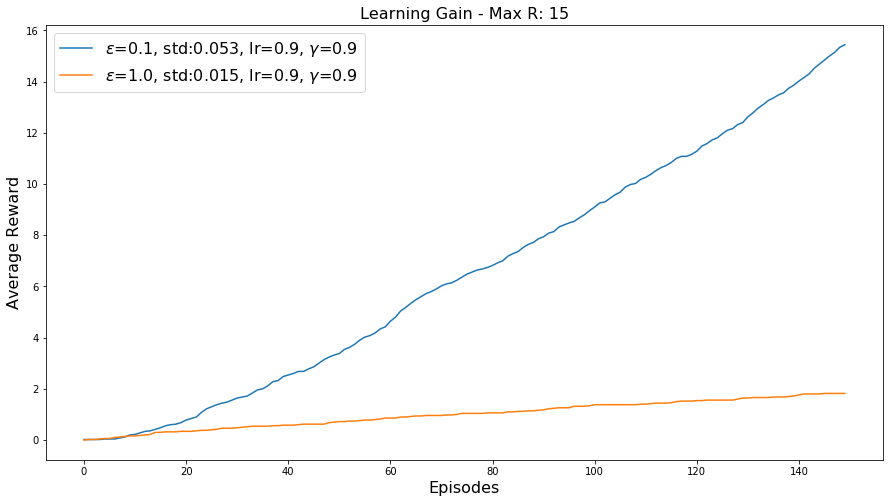

CPU times: user 3.95 s, sys: 381 ms, total: 4.33 s
Wall time: 3.74 s


In [58]:
%%time
plot_average_rewards(N=50,episodes=150,epsilon=0.1,alpha=0.9,gamma=0.9)

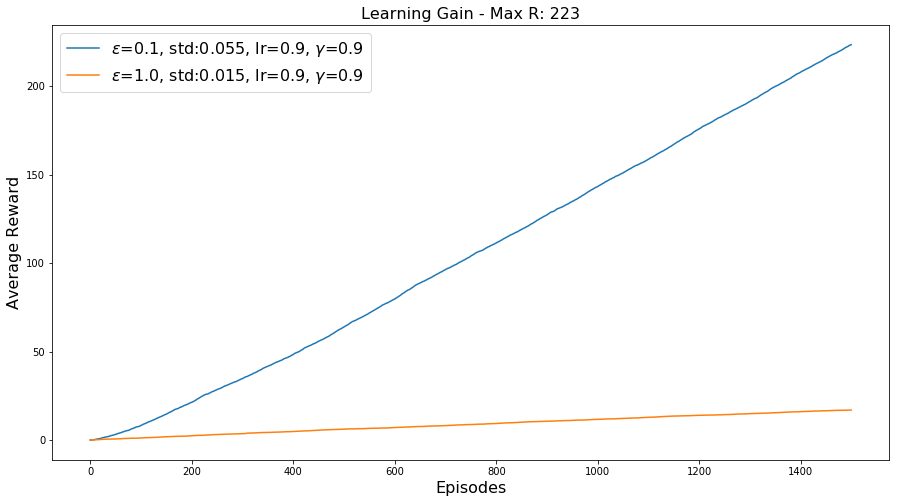

CPU times: user 37.2 s, sys: 501 ms, total: 37.7 s
Wall time: 37.1 s


In [53]:
%%time
plot_average_rewards(N=50,episodes=1500,epsilon=0.1,alpha=0.9,gamma=0.9)

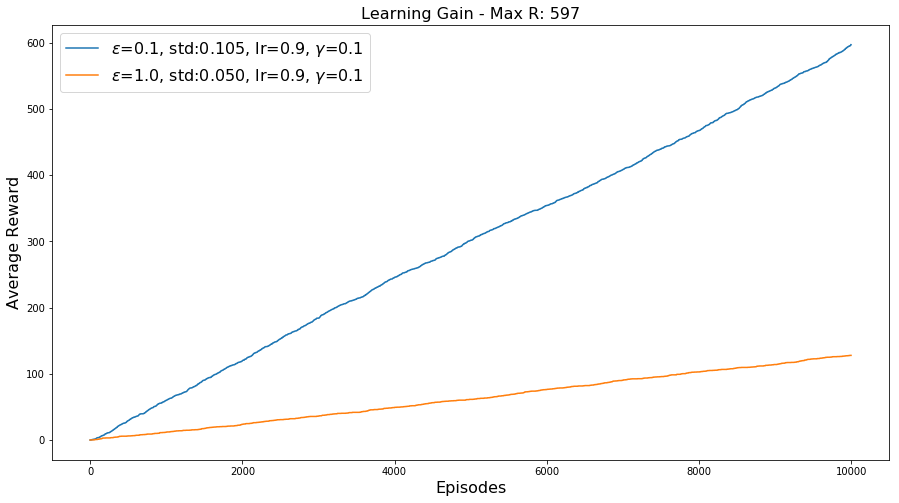

CPU times: user 18.1 s, sys: 601 ms, total: 18.7 s
Wall time: 17.9 s


In [57]:
%%time
plot_average_rewards(N=5,episodes=10000,epsilon=0.1,alpha=0.9,gamma=0.1)

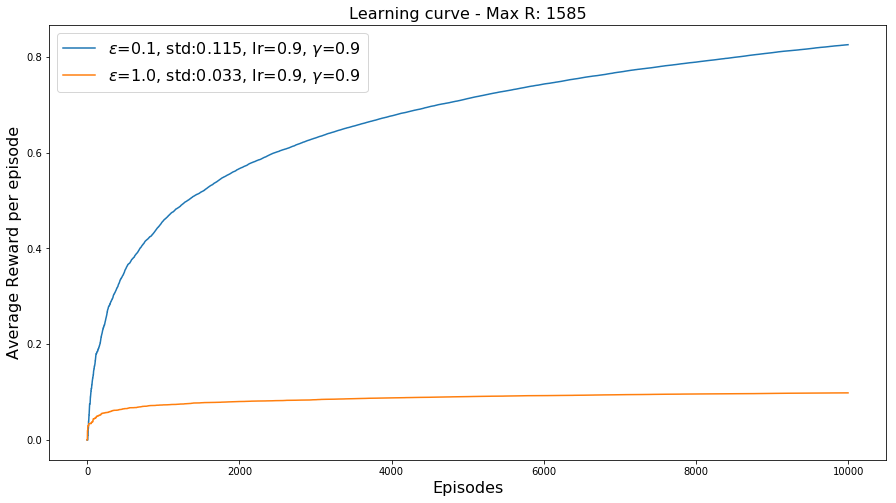

CPU times: user 49.2 s, sys: 545 ms, total: 49.8 s
Wall time: 49.1 s


In [56]:
%%time
plot_average_rewards_per_episode(N=10,episodes=10000,epsilon=0.1,alpha=0.9,gamma=0.9)

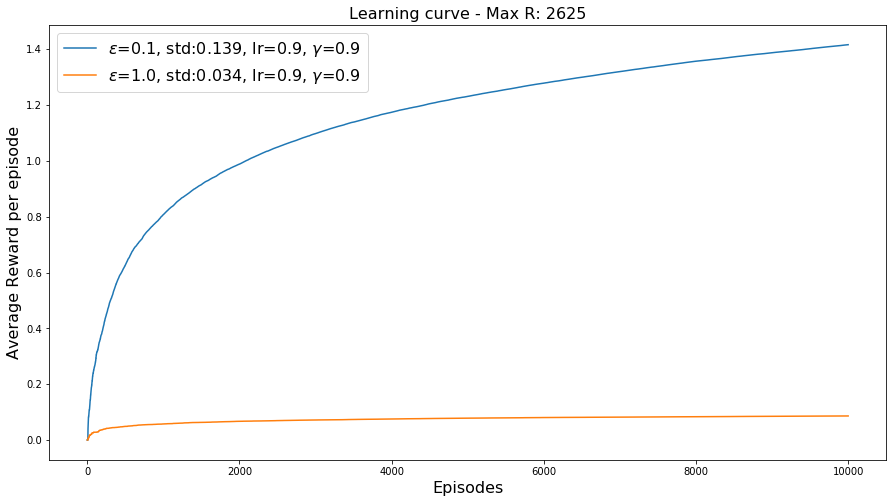

CPU times: user 56.8 s, sys: 831 ms, total: 57.6 s
Wall time: 56.7 s


In [60]:
%%time
plot_average_rewards_per_episode(N=10,episodes=10000,epsilon=0.05,alpha=0.9,gamma=0.9)

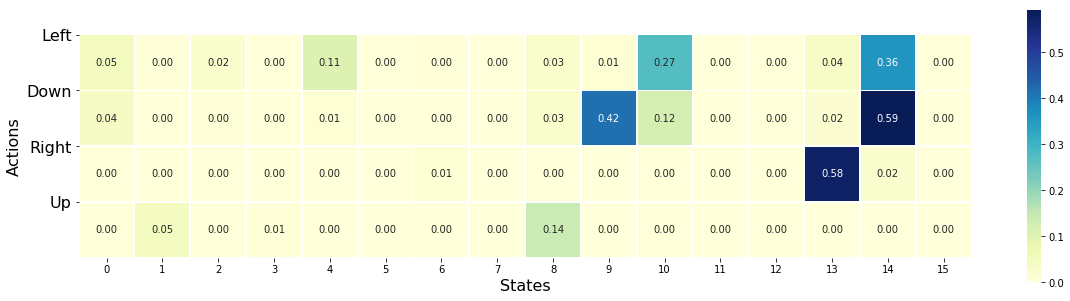

CPU times: user 32.8 s, sys: 600 ms, total: 33.4 s
Wall time: 32.6 s


In [55]:
%%time
var_qnetwork(N=5,episodes=20000,epsilon=0.1,alpha=0.9,gamma=0.95)